Date : 03.10.2022
###### Author : Meriem HAFID                                                                                              

In [1]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from numpy import matmul

In [2]:
data = pd.read_excel('https://www.oliviergueant.com/uploads/4/3/0/9/4309511/sbf120_as_of_end_2018.xlsx', sheet_name = 'Data')

##### We start by cleaning the data and selecting the right marketcap data.

In [3]:
dataframe_list = []
for i in range(120):
    marketcap_data = data.iloc[:,[3*i,3*i+2]].copy() #we use a list containing the equity (3*i) and the Marketcap (3*i+2)
    marketcap_data.dropna(inplace=True)
    marketcap_data.iloc[:,0] = pd.to_datetime(marketcap_data.iloc[:,0], unit= 'D', origin= '1899-12-30')
    marketcap_data.rename(columns = {marketcap_data.columns[0] : 'Date', marketcap_data.columns[1]: marketcap_data.columns[0]}, inplace = True)
    marketcap_data.set_index('Date', inplace = True) #We set the index as date
    dataframe_list.append(marketcap_data) 

agg_marktcap_data = dataframe_list[0]
for df in tqdm(dataframe_list[1:]):
    agg_marktcap_data = agg_marktcap_data.join(df, how='outer', sort = True)

100%|███████████████████████████████████████████████████████████████████████████████| 119/119 [00:00<00:00, 156.56it/s]


##### Arranging the data from the top stocks of the end of 2018 according to the marketcap

In [4]:
top_marketcap_data = agg_marktcap_data.sort_values('2018-12-31', axis = 1, ascending = False)

##### Taking the 10 top stocks with the highest market apitalization as of end 2018.

In [5]:
top10_marketcap_data = top_marketcap_data.iloc[:,0:10]
top10_marketcap_data.columns.tolist()

['MC FP Equity',
 'TTE FP Equity',
 'OR FP Equity',
 'SAN FP Equity',
 'AIR FP Equity',
 'KER FP Equity',
 'RMS FP Equity',
 'BNP FP Equity',
 'EL FP Equity',
 'AI FP Equity']

##### In this step we select the price data of our top 10 stocks

In [6]:
df_list = []
for k in tqdm(range(120)):
    if (data.iloc[:,[3*k]].columns.tolist()[0] in top10_marketcap_data.columns.tolist()):
        #data.iloc[:,[3*k]].columns.tolist()[0] give index of each stock. 
        #We make sure to take just the 10 top stocks seen before.
        price_topdata = data.iloc[:,[3*k,3*k+1]].copy()
        price_topdata.dropna(inplace=True)
        price_topdata.iloc[:,0] = pd.to_datetime(price_topdata.iloc[:,0], unit= 'D', origin= '1899-12-30')
        price_topdata.rename(columns = {price_topdata.columns[0] : 'Date', price_topdata.columns[1]: price_topdata.columns[0]}, inplace = True)
        price_topdata.set_index('Date', inplace = True)
        df_list.append(price_topdata) 

agg_price_data = df_list[0]
for df in tqdm(df_list[1:]):
    agg_price_data = agg_price_data.join(df, how='outer', sort = True)

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 450.83it/s]


In [7]:
for ticker in tqdm(agg_price_data.columns):
    series = agg_price_data[ticker]
    first = series.first_valid_index()
    last = series.last_valid_index()
    series_real = series[(series.index >= first) & (series.index <= last)].fillna(method = 'bfill')
    agg_price_data[ticker][(agg_price_data[ticker].index >= first) & (agg_price_data[ticker].index <= last)] = series_real

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 464.07it/s]


##### Daily returns : 

In [8]:
StockReturns = agg_price_data.pct_change().dropna() 
#The first date 2010-12-31 does not have a value since it is our cut-off date

#### Covariance matrix of 2019 : 

In [9]:
cov_matrix2019 = StockReturns.loc['2019'].cov()
cov_matrix2019

,OR FP Equity,TTE FP Equity,AI FP Equity,BNP FP Equity,EL FP Equity,MC FP Equity,KER FP Equity,RMS FP Equity,SAN FP Equity,AIR FP Equity
OR FP Equity,0.000135,0.000039,0.000062,0.000023,0.000052,0.000087,0.000072,0.000070,0.000066,0.000065
TTE FP Equity,0.000039,0.000121,0.000049,0.000087,0.000037,0.000067,0.000082,0.000042,0.000036,0.000061
AI FP Equity,0.000062,0.000049,0.000102,0.000062,0.000053,0.000085,0.000081,0.000059,0.000049,0.000066
BNP FP Equity,0.000023,0.000087,0.000062,0.000248,0.000067,0.000099,0.000105,0.000055,0.000034,0.000086
EL FP Equity,0.000052,0.000037,0.000053,0.000067,0.000181,0.000079,0.000068,0.000064,0.000035,0.000057
MC FP Equity,0.000087,0.000067,0.000085,0.000099,0.000079,0.000225,0.000170,0.000124,0.000060,0.000123
KER FP Equity,0.000072,0.000082,0.000081,0.000105,0.000068,0.000170,0.000298,0.000118,0.000056,0.000118
RMS FP Equity,0.000070,0.000042,0.000059,0.000055,0.000064,0.000124,0.000118,0.000123,0.000049,0.000089
SAN FP Equity,0.000066,0.000036,0.000049,0.000034,0.000035,0.000060,0.000056,0.000049,0.000149,0.000055
AIR FP Equity,0.000065,0.000061,0.000066,0.000086,0.000057,0.000123,0.000118,0.000089,0.000055,0.000215


#### Covariance matrix of 2017-2018 : 

In [10]:
cov_matrix2017_2018 = StockReturns[(StockReturns.index >= '01/01/2017') & (StockReturns.index <= '31/12/2018')].cov()
cov_matrix2017_2018

,OR FP Equity,TTE FP Equity,AI FP Equity,BNP FP Equity,EL FP Equity,MC FP Equity,KER FP Equity,RMS FP Equity,SAN FP Equity,AIR FP Equity
OR FP Equity,0.000107,0.000036,0.000053,0.000031,0.000049,0.000082,0.000084,0.000050,0.000045,0.000060
TTE FP Equity,0.000036,0.000105,0.000051,0.000060,0.000029,0.000061,0.000051,0.000027,0.000036,0.000059
AI FP Equity,0.000053,0.000051,0.000103,0.000060,0.000044,0.000079,0.000084,0.000039,0.000045,0.000083
BNP FP Equity,0.000031,0.000060,0.000060,0.000169,0.000033,0.000065,0.000052,0.000025,0.000039,0.000075
EL FP Equity,0.000049,0.000029,0.000044,0.000033,0.000143,0.000063,0.000059,0.000035,0.000034,0.000056
MC FP Equity,0.000082,0.000061,0.000079,0.000065,0.000063,0.000187,0.000176,0.000087,0.000043,0.000102
KER FP Equity,0.000084,0.000051,0.000084,0.000052,0.000059,0.000176,0.000304,0.000101,0.000032,0.000110
RMS FP Equity,0.000050,0.000027,0.000039,0.000025,0.000035,0.000087,0.000101,0.000107,0.000021,0.000053
SAN FP Equity,0.000045,0.000036,0.000045,0.000039,0.000034,0.000043,0.000032,0.000021,0.000106,0.000044
AIR FP Equity,0.000060,0.000059,0.000083,0.000075,0.000056,0.000102,0.000110,0.000053,0.000044,0.000227


#### Mean of daily returns period 2019 :

In [11]:
mean_returns = StockReturns.loc['2019'].mean()

#### Standard deviation and annualized standard deviation period 2019 : 

In [12]:
sd = StockReturns.loc['2019'].std()
sd_annualized = sd*np.sqrt(252)

In [13]:
Stocks = pd.concat([mean_returns, sd_annualized], axis=1)
Stocks.columns = ['Returns', 'Volatility']
Stocks

,Returns,Volatility
OR FP Equity,0.001133,0.184264
TTE FP Equity,0.000309,0.174748
AI FP Equity,0.001019,0.160018
BNP FP Equity,0.001267,0.249979
EL FP Equity,0.000901,0.213497
MC FP Equity,0.001967,0.238108
KER FP Equity,0.001529,0.274114
RMS FP Equity,0.001309,0.176215
SAN FP Equity,0.000738,0.193872
AIR FP Equity,0.001838,0.232914


### Equally Weighted Portfolio

##### We will construct a portfolio with equal weights for all of those 10 top companies of the end of 2018 means that we will invist 10% in each stock.

In [14]:
Portfolio_EW_weights = np.repeat(1/10, 10) 
Portfolio_EW_weights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

#### Equally wieghted portfolio returns, variance and standard deviation:

In [15]:
Portfolio_EW_returns = (StockReturns.loc['2019'] * Portfolio_EW_weights).sum(axis=1) #returns
Portfolio_EW_return = (np.sum(mean_returns * Portfolio_EW_weights)) * 252     #annualized returns
Portfolio_EW_var = np.dot(Portfolio_EW_weights.T,np.dot(cov_matrix2019,Portfolio_EW_weights)) #variance
Portfolio_EW_sd = np.sqrt(Portfolio_EW_var) #standard deviation

In [16]:
data1 = {'Returns':[Portfolio_EW_return], 'standard deviation':[Portfolio_EW_sd]}
for counter, symbol in enumerate(top10_marketcap_data.columns.tolist()):
   data1[symbol+' weight'] = [w[counter] for w in [Portfolio_EW_weights]]
portfolio = pd.DataFrame(data1)
portfolio

,Returns,standard deviation,MC FP Equity weight,TTE FP Equity weight,OR FP Equity weight,SAN FP Equity weight,AIR FP Equity weight,KER FP Equity weight,RMS FP Equity weight,BNP FP Equity weight,EL FP Equity weight,AI FP Equity weight
0,0.302655,0.009014,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


### Markowitz minimum-variance Portfolio

##### In this part we are doing a simulation of 5000 random portfolios to design the efficient frontier, the loop considers different weights for assets and calculates the return and volatility of that particular portfolio combination.

In [17]:
Portfolio_MV_return = [] # Define an empty array for portfolio returns
Portfolio_MV_sd = [] # Define an empty array for portfolio volatility
Portfolio_MV_weights = [] # Define an empty array for asset weights

for portfolio in range(5000):
    weights = np.random.random(10)
    weights = weights/np.sum(weights)# Normalize to unity because the sum of weights must be 1
    Portfolio_MV_weights.append(weights)
    returns = (np.sum(mean_returns * weights)) * 252 #annualized returns
    Portfolio_MV_return.append(returns)
    ann_sd = np.sqrt(np.transpose(weights) @ (cov_matrix2017_2018 * 252) @ weights) # Annual standard deviation = volatility
    Portfolio_MV_sd.append(ann_sd)

In [18]:
data2 = {'Returns':Portfolio_MV_return, 'Volatility':Portfolio_MV_sd}
for counter, symbol in enumerate(top10_marketcap_data.columns.tolist()):
    data2[symbol+' weight'] = [w[counter] for w in Portfolio_MV_weights]

In [19]:
portfolios = pd.DataFrame(data2)
portfolios.head()

,Returns,Volatility,MC FP Equity weight,TTE FP Equity weight,OR FP Equity weight,SAN FP Equity weight,AIR FP Equity weight,KER FP Equity weight,RMS FP Equity weight,BNP FP Equity weight,EL FP Equity weight,AI FP Equity weight
0,0.280151,0.132029,0.058640,0.142222,0.106853,0.056485,0.136434,0.166576,0.120379,0.029610,0.171477,0.011324
1,0.311189,0.130431,0.065348,0.030689,0.121380,0.149439,0.110103,0.135146,0.094554,0.124078,0.131697,0.037566
2,0.311687,0.142475,0.038587,0.159947,0.036654,0.071243,0.019925,0.181243,0.167460,0.057236,0.164918,0.102786
3,0.296647,0.125449,0.161033,0.034681,0.024219,0.098447,0.230650,0.053148,0.057425,0.143651,0.104714,0.092032
4,0.298189,0.127097,0.056222,0.090338,0.137884,0.126542,0.120396,0.086818,0.068230,0.138286,0.087233,0.088051


In [20]:
portfolios[portfolios['Volatility']==portfolios['Volatility'].min()]

,Returns,Volatility,MC FP Equity weight,TTE FP Equity weight,OR FP Equity weight,SAN FP Equity weight,AIR FP Equity weight,KER FP Equity weight,RMS FP Equity weight,BNP FP Equity weight,EL FP Equity weight,AI FP Equity weight
2415,0.23875,0.114703,0.127617,0.139756,0.058311,0.0989,0.138695,0.001994,0.03438,0.123398,0.251943,0.025005


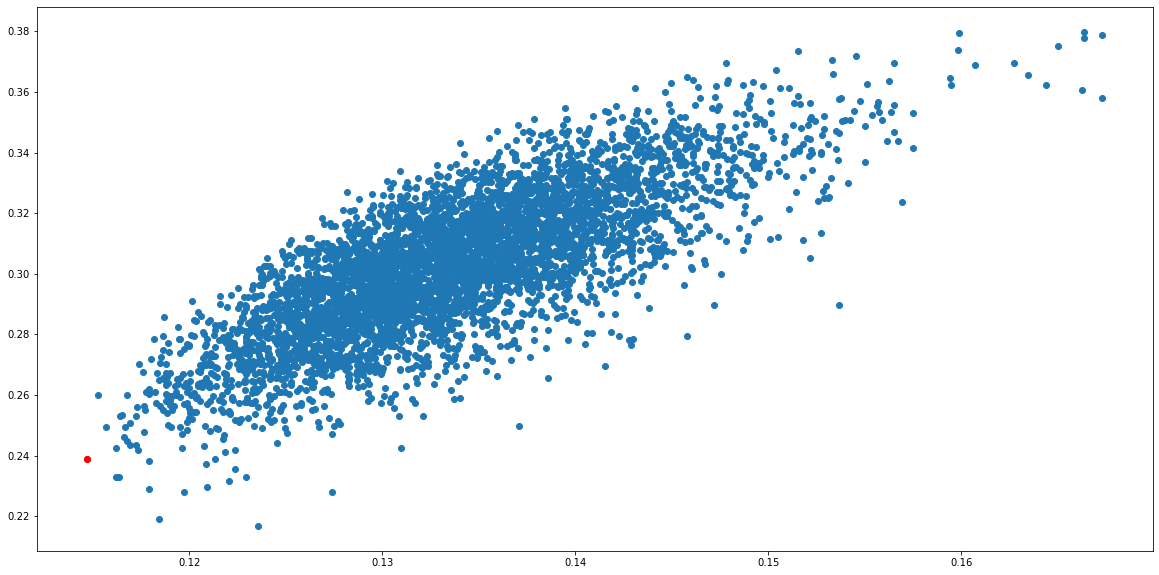

In [21]:
MV_portfolio = portfolios.iloc[portfolios['Volatility'].idxmin()]# idxmin() gives us the minimum value in the column specified.                               
plt.subplots(figsize=(20,10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'])
plt.scatter(MV_portfolio[1], MV_portfolio[0], color='red')

##### Retruns of the MV portfolio :

In [22]:
Portfolio_MV_returns = (StockReturns.loc['2019']*(MV_portfolio[2:].values)).sum(axis=1)

### Equal Risk Contribution Portfolio : 

##### To compute this portfolio we use the Jacobi power algorthm written in the book “Introduction to risk parity and budgeting” by T. Roncalli (page 62-63) 

In [23]:
Portfolio_ERC_return = [] # Define an empty array for portfolio returns
Portfolio_ERC_sd = [] # Define an empty array for portfolio volatility
Portfolio_ERC_weights = [] # Define an empty array for asset weights

weights2= np.full((10, 1), 0.1, dtype=float) #The weights of the initial portfolio 

old_weights2 = np.full((10, 1), 0, dtype=float)
#An object who will kept the weight of the last itaration in order to
#compare x_k (x) and x_(k-1) at the iteration 1 (old_x) and decide when we stop the algorithm


while (max(abs(old_weights2-weights2)) >=  1.0e-06): #we stop the algorithme with the stopping criteria given in the book(end of page 63)
    beta_inv = matmul(cov_matrix2017_2018.values,weights2)**(-1)*matmul(weights2.T,matmul(cov_matrix2017_2018.values,weights2))
    #computation of the numerator of the formula 
    old_weights2, weights2  = weights2, beta_inv/float(matmul(np.full((1, 10),1,dtype=float),beta_inv)) 
    #assignation of the new values old_weights2
    
    #construction of portfolio and computation of returns 
    Portfolio_ERC_weights.append(weights2.T[0])
    returns = (np.sum(mean_returns * (weights2.T[0]))) * 252 #annualized returns
    Portfolio_ERC_return.append(returns)
    ann_sd2 = np.sqrt(np.transpose(weights2.T[0]) @ (cov_matrix2017_2018 * 252) @ weights2.T[0]) #annualized standard deviation
    Portfolio_ERC_sd.append(ann_sd2)

In [24]:
data3 = {'Returns':Portfolio_ERC_return, 'Volatility':Portfolio_ERC_sd}
for counter, symbol in enumerate(top10_marketcap_data.columns.tolist()):
    data3[symbol+' weight'] = [w[counter] for w in Portfolio_ERC_weights]

In [25]:
#We show the portfolios of each iteration and see the convergence
portfolios2 = pd.DataFrame(data3)
portfolios2

,Returns,Volatility,MC FP Equity weight,TTE FP Equity weight,OR FP Equity weight,SAN FP Equity weight,AIR FP Equity weight,KER FP Equity weight,RMS FP Equity weight,BNP FP Equity weight,EL FP Equity weight,AI FP Equity weight
0,0.277953,0.122314,0.105604,0.122066,0.098373,0.103238,0.115415,0.066555,0.059682,0.115324,0.141293,0.072451
1,0.282901,0.123595,0.106022,0.118094,0.099690,0.101624,0.111960,0.071139,0.066896,0.119834,0.127833,0.076908
2,0.281680,0.123297,0.105760,0.119052,0.099504,0.102360,0.112735,0.070103,0.065158,0.117647,0.131589,0.076091
3,0.282004,0.123371,0.105872,0.118783,0.099522,0.102076,0.112578,0.070379,0.065612,0.118383,0.130544,0.076251
4,0.281914,0.123351,0.105832,0.118866,0.099524,0.102178,0.112606,0.070302,0.065485,0.118155,0.130834,0.076218
5,0.281939,0.123357,0.105845,0.118840,0.099522,0.102143,0.112603,0.070324,0.065521,0.118224,0.130753,0.076225
6,0.281932,0.123355,0.105841,0.118848,0.099523,0.102155,0.112603,0.070317,0.065511,0.118203,0.130776,0.076223
7,0.281934,0.123356,0.105842,0.118845,0.099523,0.102151,0.112603,0.070319,0.065514,0.118209,0.130769,0.076224
8,0.281934,0.123355,0.105842,0.118846,0.099523,0.102152,0.112603,0.070319,0.065513,0.118208,0.130771,0.076224
9,0.281934,0.123355,0.105842,0.118846,0.099523,0.102152,0.112603,0.070319,0.065513,0.118208,0.130771,0.076224


In [26]:
#We keep only the last one 
portfolios2.iloc[-1:]

,Returns,Volatility,MC FP Equity weight,TTE FP Equity weight,OR FP Equity weight,SAN FP Equity weight,AIR FP Equity weight,KER FP Equity weight,RMS FP Equity weight,BNP FP Equity weight,EL FP Equity weight,AI FP Equity weight
9,0.281934,0.123355,0.105842,0.118846,0.099523,0.102152,0.112603,0.070319,0.065513,0.118208,0.130771,0.076224


#### Portfolio returns : 

In [27]:
Portfolio_ERC_returns = (StockReturns.loc['2019'] * Portfolio_ERC_weights[-1:][0]).sum(axis=1)
Portfolio_ERC_var = np.dot(Portfolio_ERC_weights[-1:][0],np.dot(cov_matrix2017_2018, Portfolio_ERC_weights[-1:][0]))
Portfolio_ERC_sd = np.sqrt(Portfolio_ERC_var)

##### Strategy part : 

In [28]:
from strategy import Strategy

In [29]:
fontsize = 9
width_in_cm = 14
params = {'figure.figsize': (width_in_cm / 1, width_in_cm / 1 * 9./16.),
          'axes.labelsize': fontsize*2,
          'axes.titlesize': fontsize*2,
          'xtick.labelsize': fontsize*2,
          'ytick.labelsize': fontsize*2,
          'legend.fontsize': fontsize*2}
plt.rcParams.update(params)

In [30]:
ERC = Strategy('ERC', Portfolio_ERC_returns)
MV = Strategy('MV', Portfolio_MV_returns)
EW = Strategy('EW', Portfolio_EW_returns)

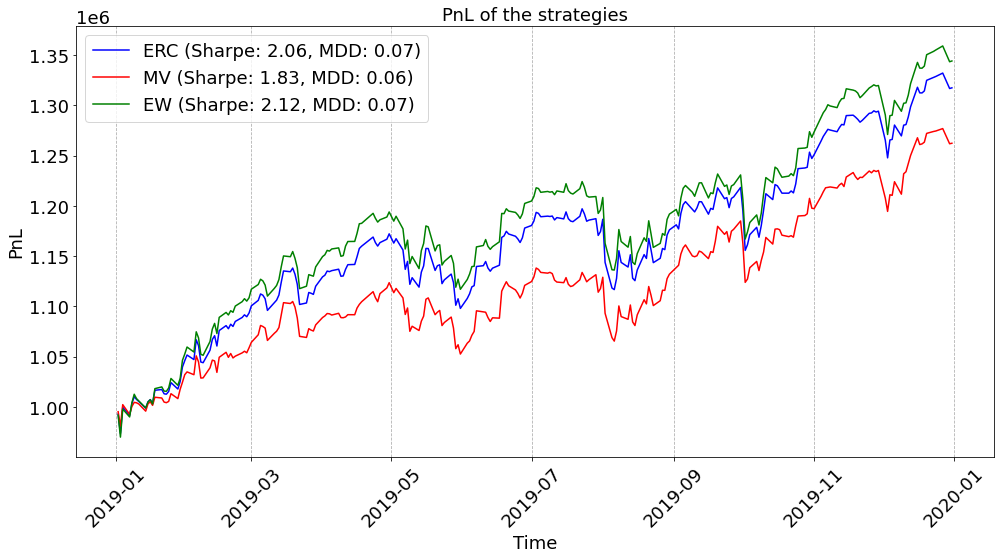

In [31]:
fig, ax = plt.subplots(1, 1)
ax.plot(ERC.returns.index, ERC.pnl[1:], 'b', label=ERC.name + ' (Sharpe: %.2f, MDD: %.2f)'%
                                                    (ERC.sharpe_ratio(), ERC.max_dd()))
ax.plot(MV.returns.index, MV.pnl[1:], 'r', label=MV.name + ' (Sharpe: %.2f, MDD: %.2f)'%
                                                    (MV.sharpe_ratio(), MV.max_dd()))
ax.plot(EW.returns.index, EW.pnl[1:], 'g', label=EW.name + ' (Sharpe: %.2f, MDD: %.2f)'%
                                                    (EW .sharpe_ratio(), EW.max_dd()))
ax.set_xlabel('Time')
ax.set_ylabel('PnL')
ax.legend()
ax.tick_params(axis='x', rotation=45)
ax.set_title(f'PnL of the strategies')
ax.grid(axis='x', linestyle='--')
fig.tight_layout()
fig.savefig(f'PnL.pdf')
plt.show()